<a href="https://colab.research.google.com/github/dhyannn/Computer-vision/blob/main/dhyan_cv_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.feature import hog, local_binary_pattern
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('cat.jpg')


In [4]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
target_size = (64, 64)
batch_size = 32

rotation_range = 40
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True
brightness_range = [0.8,1.2]

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    brightness_range=brightness_range,
    validation_split=0.2
)


In [26]:
# Feature Extraction

# 1. Histogram of Oriented Gradients (HOG)
hog_features, hog_image = hog(normalized_image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True, block_norm='L2-Hys')

# Rescale histogram for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# 2. Local Binary Patterns (LBP)
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# 3. Color Histograms (for color images)
# Split image into color channels
b, g, r = cv2.split(image)

# Compute histograms for each channel
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Concatenate histograms
color_hist = np.concatenate((hist_b, hist_g, hist_r), axis=0).flatten()

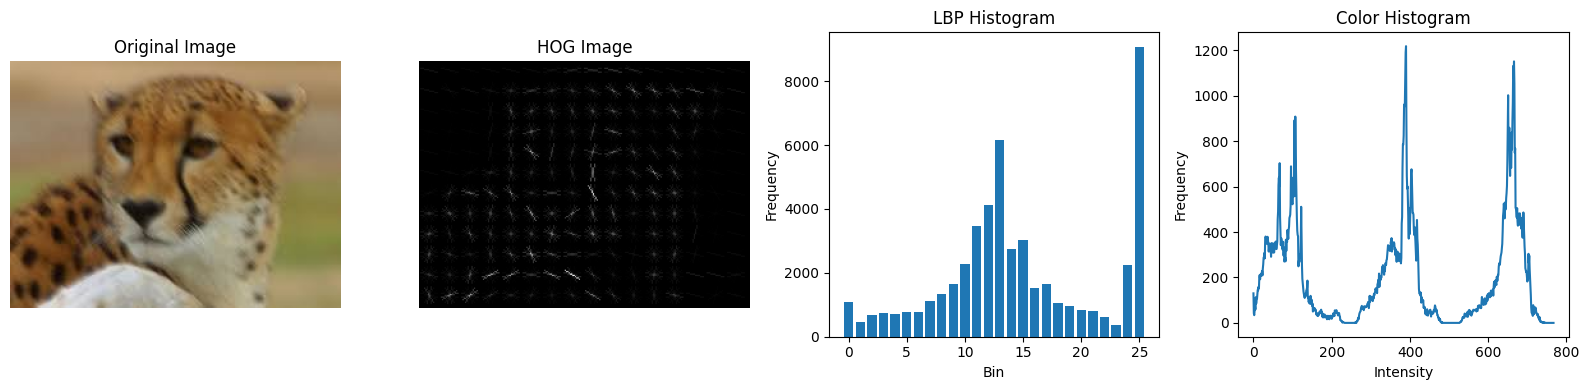

In [27]:
# Display images and features
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(image[:, :, ::-1])
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(hog_image_rescaled, cmap='gray')
axs[1].set_title('HOG Image')
axs[1].axis('off')

axs[2].bar(np.arange(len(hist)), hist)
axs[2].set_title('LBP Histogram')
axs[2].set_xlabel('Bin')
axs[2].set_ylabel('Frequency')

axs[3].plot(color_hist)
axs[3].set_title('Color Histogram')
axs[3].set_xlabel('Intensity')
axs[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()